In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('police_project.csv')

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.describe(include='all')

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
count,91741,91741,0.0,86406,86414.000000,86120.000000,86408,86408,86408,91741,3196,86408,86408,86408,91741
unique,3768,1436,NaN,2,NaN,NaN,5,12,6,2,24,6,2,5,2
top,2012-01-11,11:00,NaN,M,NaN,NaN,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False
freq,69,323,NaN,62895,NaN,NaN,62158,48463,48463,88545,1219,77006,83479,69543,90926
mean,NaN,NaN,NaN,NaN,1970.491228,34.011333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,110.914909,12.738564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1967.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1980.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1987.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [6]:
df.head(5)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Removing country column since it contains all missing values

In [7]:
df['county_name'].isnull().value_counts()

True    91741
Name: county_name, dtype: int64

In [8]:
df.drop('county_name', axis=1, inplace=True)

In [9]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Number of male and female drivers

In [10]:
male = df.driver_gender[df['driver_gender'] == 'M']

In [11]:
female = df.driver_gender[df['driver_gender'] == 'F']

In [12]:
male_count = male.notnull().value_counts()
male_count

True    62895
Name: driver_gender, dtype: int64

In [13]:
female_count = female.notnull().value_counts()
female_count

True    23511
Name: driver_gender, dtype: int64

In [14]:
total = male.notnull().value_counts() + female.notnull().value_counts()
total

True    86406
Name: driver_gender, dtype: int64

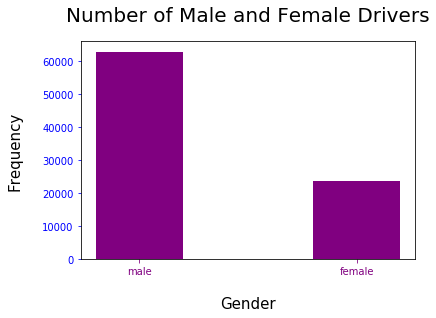

In [15]:
plt.bar(('male', 'female'), (male_count[True], female_count[True]), color='purple', align='center', width=0.4)
plt.title('Number of Male and Female Drivers', size=20, pad=20)
plt.xlabel('Gender', size=15, labelpad=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.tick_params(axis='x', colors='purple')
plt.tick_params(axis='y', colors='blue')

# Age of Drivers

In [16]:
df.driver_age.head()

0    20.0
1    40.0
2    33.0
3    19.0
4    21.0
Name: driver_age, dtype: float64

In [17]:
age_drivers = df.driver_age.notnull().value_counts()
age_drivers

True     86120
False     5621
Name: driver_age, dtype: int64

In [18]:
age = np.arange(1, 101)

In [19]:
age

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [20]:
ages = np.array(df.driver_age[df['driver_age'].notnull()])

In [21]:
ages

array([20., 40., 33., ..., 23., 22., 56.])

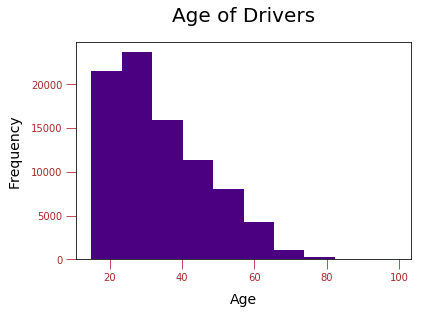

In [22]:
plt.hist(ages, bins=10, color='indigo')
plt.title('Age of Drivers',pad=20, size=20)
plt.xlabel('Age', labelpad=10, size=14)
plt.ylabel('Frequency', labelpad=10, size=14)
plt.tick_params(axis='both', colors='brown', size=10)

# Male Drivers Age

In [23]:
male_count[True]

62895

In [24]:
male_drivers_age = df[(df['driver_age'].notnull()) & (df['driver_gender'] == 'M')]

In [25]:
male_drivers_age.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False


(array([1.2005e+04, 1.8174e+04, 1.1125e+04, 8.8460e+03, 6.9050e+03,
        3.8010e+03, 1.3370e+03, 3.7000e+02, 7.6000e+01, 1.0000e+01]),
 array([15. , 22.9, 30.8, 38.7, 46.6, 54.5, 62.4, 70.3, 78.2, 86.1, 94. ]),
 <a list of 10 Patch objects>)

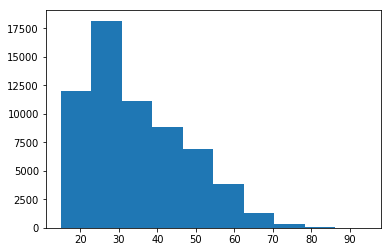

In [26]:
plt.hist(male_drivers_age['driver_age'])

# Female Driver Age

In [27]:
female_count[True]

23511

In [28]:
female_drivers_age = df[(df['driver_age'].notnull()) & (df['driver_gender'] == 'F')]

In [29]:
female_drivers_age.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
11,2005-07-13,19:00,F,1966.0,39.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
13,2005-07-18,19:30,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
19,2005-07-24,20:10,F,1958.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


(array([6.766e+03, 6.643e+03, 4.127e+03, 2.895e+03, 1.911e+03, 8.680e+02,
        2.050e+02, 4.300e+01, 5.000e+00, 1.000e+00]),
 array([15. , 23.4, 31.8, 40.2, 48.6, 57. , 65.4, 73.8, 82.2, 90.6, 99. ]),
 <a list of 10 Patch objects>)

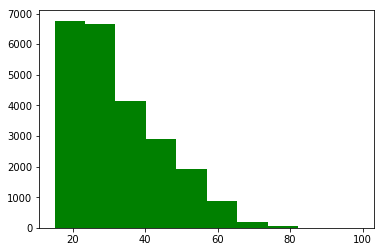

In [30]:
plt.hist(female_drivers_age.driver_age, color='green')

# Major Violations

In [31]:
df.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [32]:
violation_names = ['Speeding', 'Moving violation', 'Equipment', 'Other', 'Registration/plates', 'Seat belt']

In [33]:
violations = df.violation[df.violation.notnull()]

In [34]:
violations = violations.value_counts()

In [35]:
violations.index

Index(['Speeding', 'Moving violation', 'Equipment', 'Other',
       'Registration/plates', 'Seat belt'],
      dtype='object')

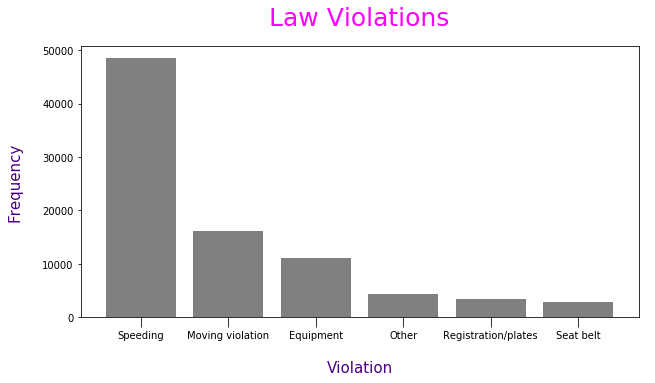

In [36]:
plt.figure(figsize=(10,5))
plt.bar(violations.index, violations, color='grey', align='center')
plt.title('Law Violations', pad=20, size=25, color='magenta')
plt.xlabel('Violation', labelpad=20, size=15, color='indigo')
plt.ylabel('Frequency', labelpad=20, size=15, color='indigo')
plt.tick_params(axis='x', size=10)

In [37]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Law Violations by Gender

In [38]:
male_count

True    62895
Name: driver_gender, dtype: int64

In [39]:
female_count

True    23511
Name: driver_gender, dtype: int64

In [40]:
violation_names

['Speeding',
 'Moving violation',
 'Equipment',
 'Other',
 'Registration/plates',
 'Seat belt']

In [41]:
male_speeding = df.violation[(df['violation'] == 'Speeding') & (df['driver_gender'] == 'M')].notnull().value_counts()

In [42]:
male_speeding

True    32979
Name: violation, dtype: int64

In [43]:
male_moving_violation = df.violation[(df['violation'] == 'Moving violation') & (df['driver_gender'] == 'M')].notnull().value_counts()

In [44]:
male_moving_violation

True    13020
Name: violation, dtype: int64

In [45]:
male_equipment = df.violation[(df['violation'] == 'Equipment') & (df['driver_gender'] == 'M')].notnull().value_counts()

In [46]:
male_equipment

True    8533
Name: violation, dtype: int64

In [47]:
male_other = df.violation[(df['violation'] == 'Other') & (df['driver_gender'] == 'M')].notnull().value_counts()

In [48]:
male_other

True    3627
Name: violation, dtype: int64

In [49]:
male_registration_plates = df.violation[(df['violation'] == 'Registration/plates') & (df['driver_gender'] == 'M')].notnull().value_counts()

In [50]:
male_registration_plates

True    2419
Name: violation, dtype: int64

In [51]:
male_seat_belt = df.violation[(df['violation'] == 'Seat belt') & (df['driver_gender'] == 'M')].notnull().value_counts()

In [52]:
male_seat_belt

True    2317
Name: violation, dtype: int64

<BarContainer object of 6 artists>

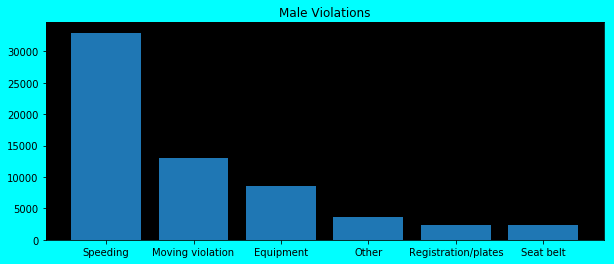

In [53]:
fig = plt.figure(figsize=(10,4))
rect = fig.patch
rect.set_facecolor('cyan')
graph1 = fig.add_subplot(1,1,1, facecolor='black', title='Male Violations')
graph1.bar(violation_names, [male_speeding[True], male_moving_violation[True], male_equipment[True], male_other[True], male_registration_plates[True], male_seat_belt[True]])

In [54]:
female_speeding = df.violation[(df['violation'] == 'Speeding') & (df['driver_gender'] == 'F')].notnull().value_counts()

In [55]:
female_speeding

True    15482
Name: violation, dtype: int64

In [56]:
female_moving_violation = df.violation[(df['violation'] == 'Moving violation') & (df['driver_gender'] == 'F')].notnull().value_counts()

In [57]:
female_moving_violation

True    3204
Name: violation, dtype: int64

In [58]:
female_equipment = df.violation[(df['violation'] == 'Equipment') & (df['driver_gender'] == 'F')].notnull().value_counts()

In [59]:
female_equipment

True    2487
Name: violation, dtype: int64

In [60]:
female_other = df.violation[(df['violation'] == 'Other') & (df['driver_gender'] == 'F')].notnull().value_counts()

In [61]:
female_other

True    690
Name: violation, dtype: int64

In [62]:
female_reg_plate = df.violation[(df['violation'] == 'Registration/plates') & (df['driver_gender'] == 'F')].notnull().value_counts()

In [63]:
female_reg_plate

True    1013
Name: violation, dtype: int64

In [64]:
female_seat_belt = df.violation[(df['violation'] == 'Seat belt') & (df['driver_gender'] == 'F')].notnull().value_counts()

In [65]:
female_seat_belt

True    635
Name: violation, dtype: int64

<BarContainer object of 6 artists>

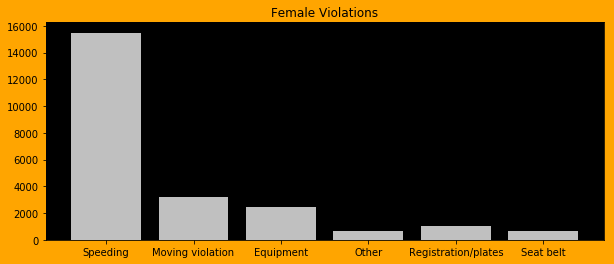

In [66]:
fig = plt.figure(figsize=(10, 4))
rect = fig.patch
rect.set_facecolor('orange')
graph2 = fig.add_subplot(1,1,1, facecolor='black', title='Female Violations')
graph2.bar(violation_names, [female_speeding[True], female_moving_violation[True], female_equipment[True], female_other[True], female_reg_plate[True], female_seat_belt[True]], color='silver')

<BarContainer object of 6 artists>

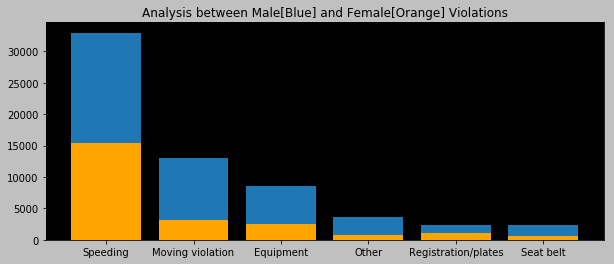

In [67]:
fig = plt.figure(figsize=(10, 4))
rect = fig.patch
rect.set_facecolor('silver')
graph = fig.add_subplot(1,1,1, fc='black', title='Analysis between Male[Blue] and Female[Orange] Violations')
graph.bar(violation_names, [male_speeding[True], male_moving_violation[True], male_equipment[True], male_other[True], male_registration_plates[True], male_seat_belt[True]])
graph.bar(violation_names, [female_speeding[True], female_moving_violation[True], female_equipment[True], female_other[True], female_reg_plate[True], female_seat_belt[True]], color='orange')

In [68]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [69]:
df.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Law Violations by Age

In [70]:
violation_names

['Speeding',
 'Moving violation',
 'Equipment',
 'Other',
 'Registration/plates',
 'Seat belt']

In [71]:
speeding_by_age = df.driver_age[(df['violation'] == 'Speeding') & (df.driver_age.notnull())]

In [72]:
speeding_by_age.notnull().value_counts()

True    48361
Name: driver_age, dtype: int64

# TEST
speeding_by_age[speeding_by_age.isnull()]

In [73]:
moving_violation_by_age = df.driver_age[(df['violation'] == 'Moving violation') & (df.driver_age.notnull())]

In [74]:
moving_violation_by_age.notnull().value_counts()

True    16164
Name: driver_age, dtype: int64

In [75]:
equipment_by_age = df.driver_age[(df['violation'] == 'Equipment') & (df.driver_age.notnull())]

In [76]:
equipment_by_age.notnull().value_counts()

True    11007
Name: driver_age, dtype: int64

In [77]:
other_by_age = df.driver_age[(df['violation'] == 'Other') & (df.driver_age.notnull())]

In [78]:
other_by_age.notnull().value_counts()

True    4204
Name: driver_age, dtype: int64

In [79]:
reg_plates_by_age = df.driver_age[(df['violation'] == 'Registration/plates') & (df.driver_age.notnull())]

In [80]:
reg_plates_by_age.notnull().value_counts()

True    3427
Name: driver_age, dtype: int64

In [81]:
seat_belts_by_age = df.driver_age[df['violation'] == 'Seat belt']

In [82]:
seat_belts_by_age.notnull().value_counts()

True    2952
Name: driver_age, dtype: int64

(array([525., 937., 549., 297., 251., 173., 133.,  57.,  18.,  12.]),
 array([17., 23., 29., 35., 41., 47., 53., 59., 65., 71., 77.]),
 <a list of 10 Patch objects>)

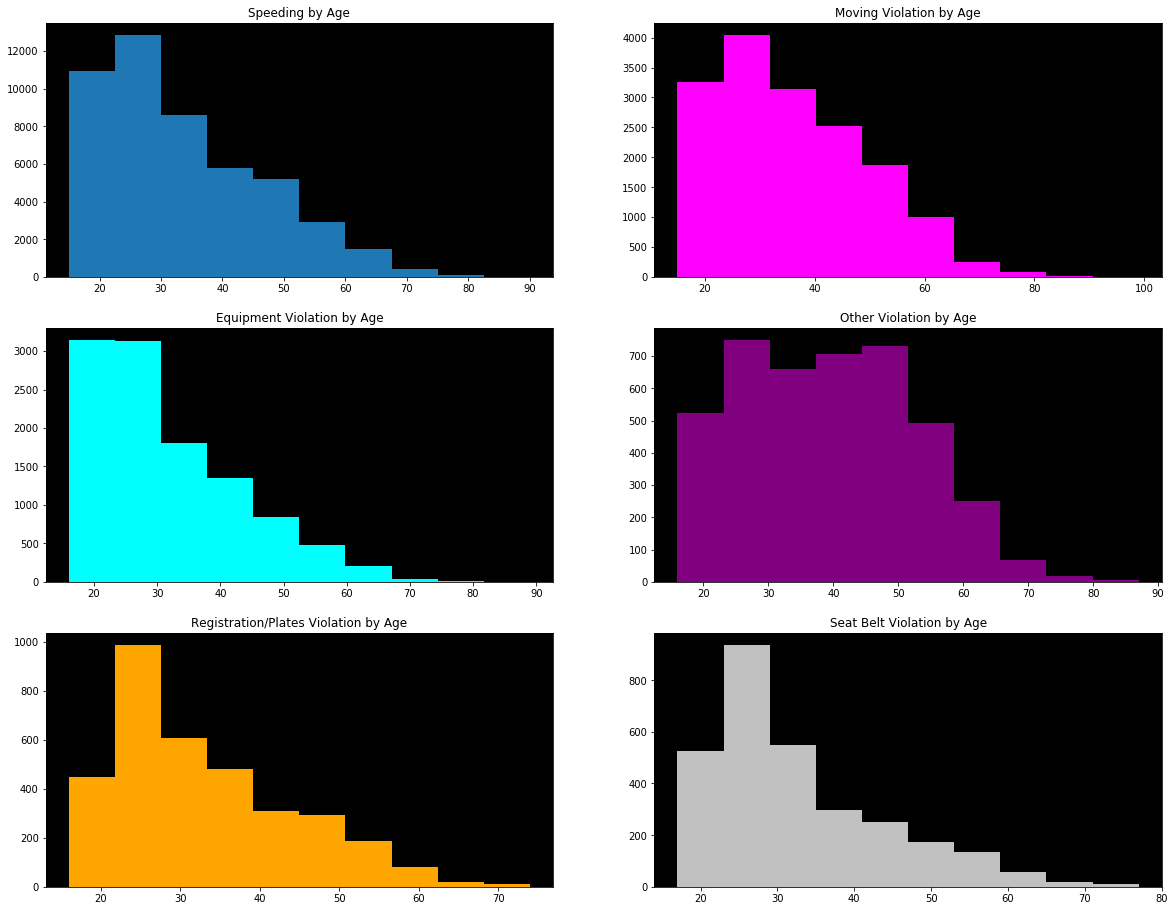

In [83]:
fig = plt.figure(figsize=(20, 6))
rect = fig.patch
rect.set_facecolor('white')
plt.subplots_adjust(bottom=4, top=6)
graph1 = fig.add_subplot(3,2,1, fc='black', title='Speeding by Age',)
graph1.hist(speeding_by_age)

graph2 = fig.add_subplot(3,2,2, fc='black', title='Moving Violation by Age')
graph2.hist(moving_violation_by_age, color='magenta')

graph3 = fig.add_subplot(3,2,3, fc='black')
graph3.set_title('Equipment Violation by Age', color='black')
graph3.hist(equipment_by_age, color='cyan')

graph4 = fig.add_subplot(3,2,4, fc='black', title='Other Violation by Age')
graph4.hist(other_by_age, color='purple')

graph5 = fig.add_subplot(3,2,5, fc='black', title='Registration/Plates Violation by Age')
graph5.hist(reg_plates_by_age, color='orange')

graph6 = fig.add_subplot(3,2,6, fc='black', title='Seat Belt Violation by Age')
graph6.hist(seat_belts_by_age, color='silver')


In [84]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Driver Race

In [85]:
races_count = df['driver_race'].value_counts()

In [86]:
races = ['White', 'Black', 'Hispanic', 'Asian', 'Other']

Text(0, 0.5, 'Range')

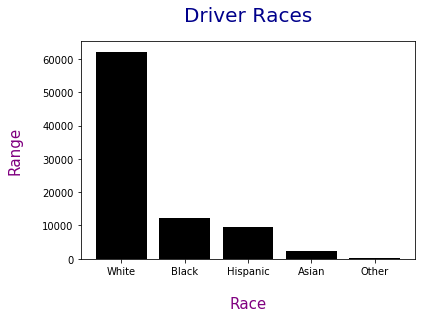

In [87]:
plt.bar(races, races_count, color='black')
plt.title('Driver Races', pad=20, size=20, color='darkblue')
plt.xlabel('Race', labelpad=20, size=15, color='purple')
plt.ylabel('Range', labelpad=20, size=15, color='purple')

# Races by Gender

In [88]:
races_count

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

In [89]:
male_races = df.driver_race[df['driver_gender'] == 'M'].value_counts()

In [90]:
male_races

White       43635
Black        9664
Hispanic     7636
Asian        1746
Other         214
Name: driver_race, dtype: int64

In [91]:
female_races = df.driver_race[df['driver_gender'] == 'F'].value_counts()

In [92]:
female_races

White       18521
Black        2580
Hispanic     1871
Asian         513
Other          26
Name: driver_race, dtype: int64

<BarContainer object of 5 artists>

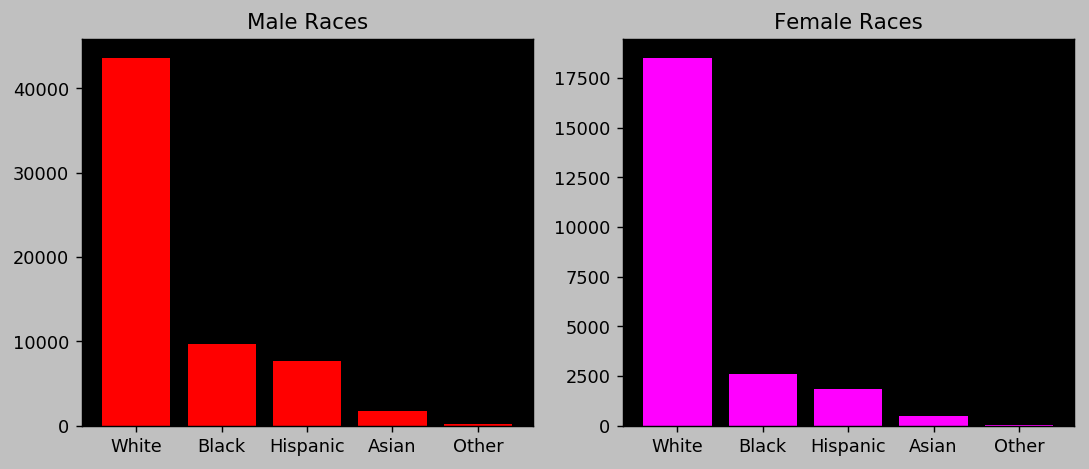

In [93]:
#plt.subplots_adjust(bottom=2, top=40)
fig = plt.figure(dpi=128, figsize=(10, 4))
rect = fig.patch
rect.set_facecolor('silver')
graph1 = fig.add_subplot(1,2,1, fc='black')
graph1.bar(races, male_races, color='red')
graph1.set_title('Male Races')
graph2 = fig.add_subplot(1,2,2, fc='black')
graph2.set_title('Female Races')
graph2.bar(races, female_races, color='magenta')

# Races by Age

In [94]:
races_count

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

In [95]:
white_age = df.driver_age[(df['driver_race'] == 'White') & (df.driver_age.notnull())]

In [96]:
white_age.notnull().value_counts()

True    61949
Name: driver_age, dtype: int64

In [97]:
black_age = df.driver_age[(df['driver_race'] == 'Black') & (df.driver_age.notnull())]

In [98]:
black_age.notnull().value_counts()

True    12197
Name: driver_age, dtype: int64

In [99]:
hispanic_age = df.driver_age[(df['driver_race'] == 'Hispanic') & (df.driver_age.notnull())]

In [100]:
hispanic_age.notnull().value_counts()

True    9477
Name: driver_age, dtype: int64

In [101]:
asian_age = df.driver_age[(df['driver_race'] == 'Asian') & (df.driver_age.notnull())]

In [102]:
asian_age.notnull().value_counts()

True    2253
Name: driver_age, dtype: int64

In [103]:
others_age = df.driver_age[(df['driver_race'] == 'Other') & (df.driver_age.notnull())]

In [104]:
others_age.notnull().value_counts()

True    239
Name: driver_age, dtype: int64

Text(0.5, 1.0, "Other's Age")

<Figure size 432x288 with 0 Axes>

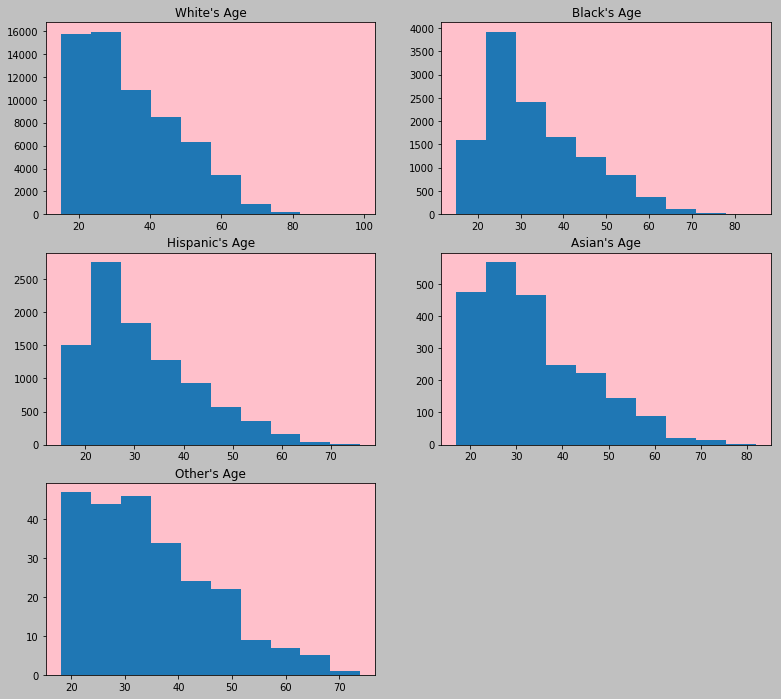

In [105]:
plt.subplots_adjust(top=20, bottom=14)
fig = plt.figure(figsize=(13, 12))
rect = fig.patch
rect.set_facecolor('silver')
graph1 = fig.add_subplot(3,2,1, fc='pink')
graph1.hist(white_age)
graph1.set_title('White\'s Age')
graph2 = fig.add_subplot(3,2,2, fc='pink')
graph2.hist(black_age)
graph2.set_title('Black\'s Age')
graph3 = fig.add_subplot(3,2,3, fc='pink')
graph3.hist(hispanic_age)
graph3.set_title('Hispanic\'s Age')
graph4 = fig.add_subplot(3,2,4, fc='pink')
graph4.hist(asian_age)
graph4.set_title('Asian\'s Age')
graph5 = fig.add_subplot(3,2,5, fc='pink')
graph5.hist(others_age)
graph5.set_title('Other\'s Age')

In [106]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Violations by Race 

In [107]:
viol = df.groupby('violation')
index_violations = viol.size().index
index_violations

Index(['Equipment', 'Moving violation', 'Other', 'Registration/plates',
       'Seat belt', 'Speeding'],
      dtype='object', name='violation')

In [108]:
rac = df.groupby('driver_race')
index_rac = rac.size().index
index_rac

Index(['Asian', 'Black', 'Hispanic', 'Other', 'White'], dtype='object', name='driver_race')

In [109]:
white_violation = df.violation[(df['violation'] == 'Speeding') & (df['driver_race'] == 'White')]

In [110]:
white_violation.notnull().value_counts()

True    38659
Name: violation, dtype: int64

In [111]:
l = []
d = {}
def violations_by_race():
    
    for each_race in index_rac:
        l = []
        for each_violation in index_violations:
            l.append(df.violation[(df['violation'] == each_violation) & (df['driver_race'] == each_race)])
            d.update({each_race:l})
violations_by_race()

Text(0.5, 1.0, 'Violations By White')

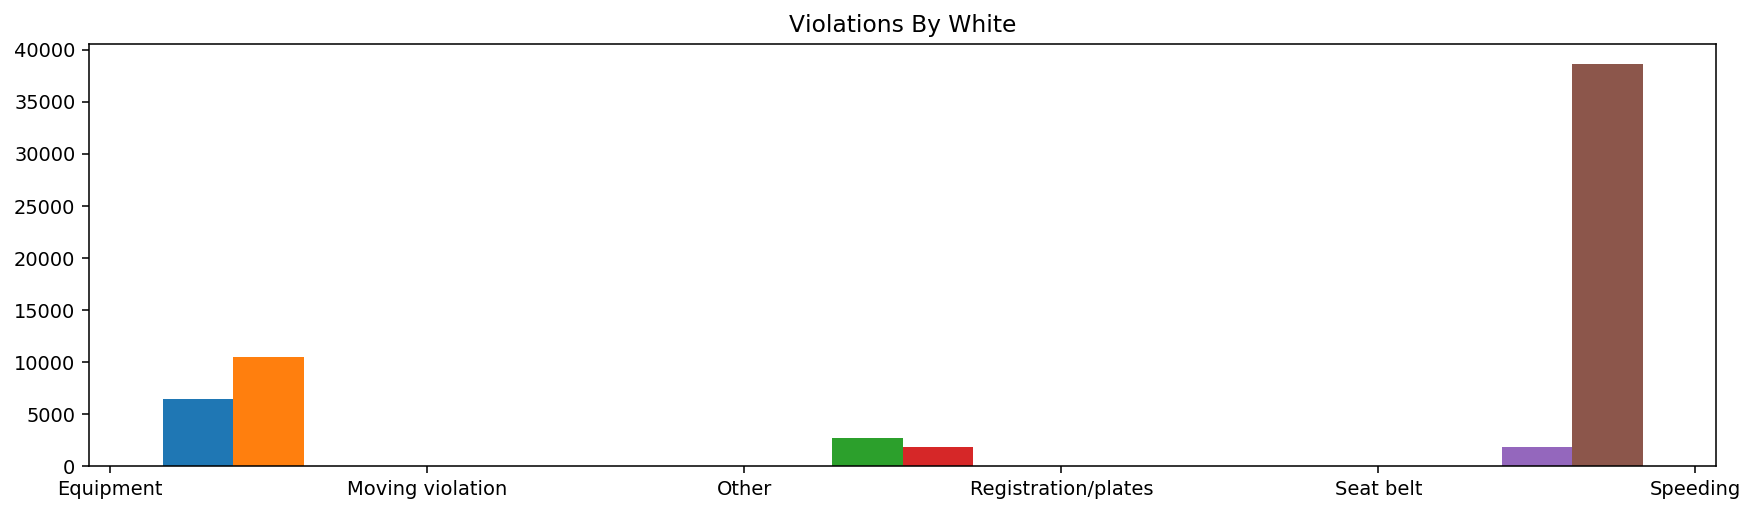

In [112]:
fig = plt.figure(dpi=140, figsize=(15, 4))
plt.hist(d['White'], bins=3)
plt.title('Violations By White')

Text(0.5, 1.0, 'Violations By Black')

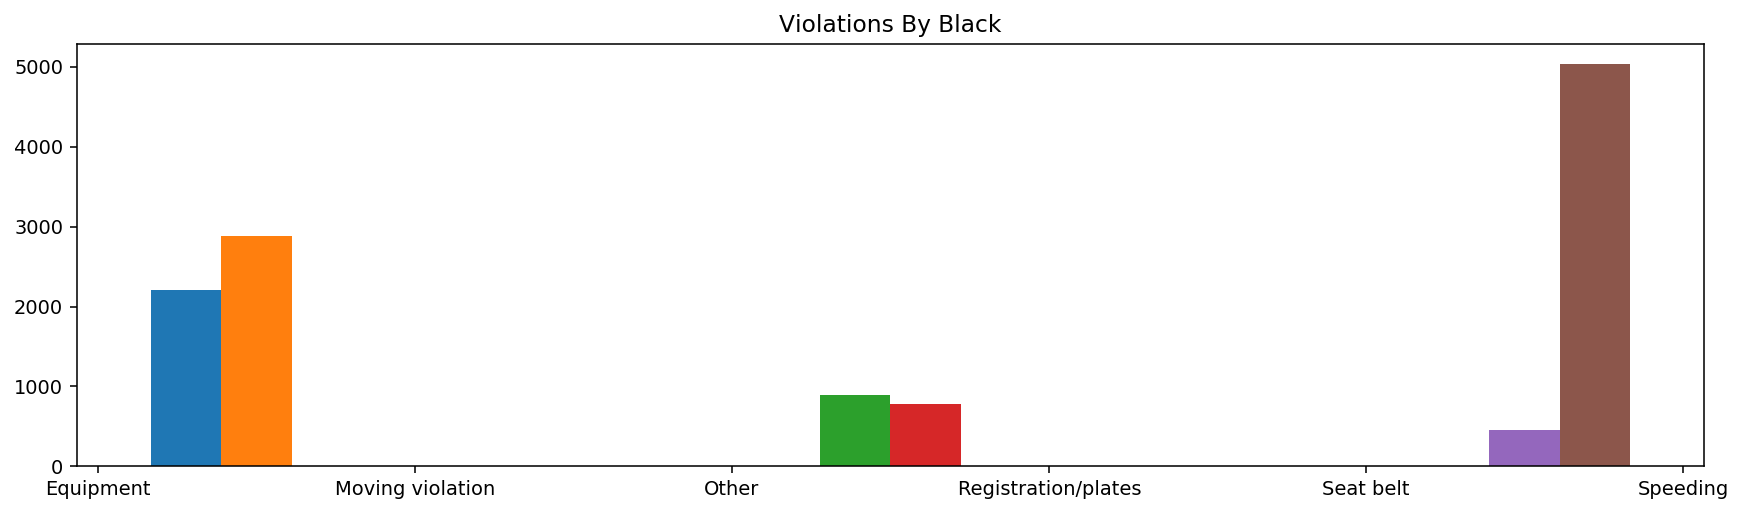

In [113]:
fig = plt.figure(dpi=140, figsize=(15, 4))
plt.hist(d['Black'], bins=3)
plt.title('Violations By Black')

Text(0.5, 1.0, 'Violations By Hispanic')

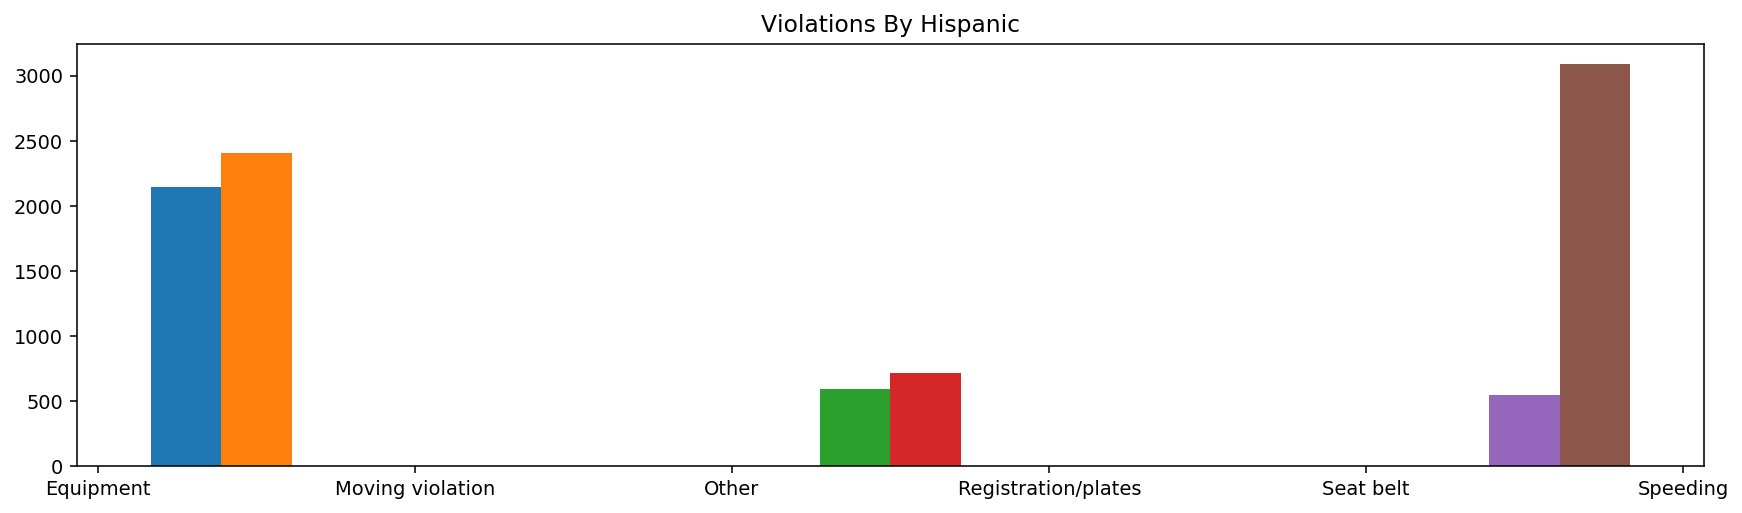

In [114]:
fig = plt.figure(dpi=140, figsize=(15, 4))
plt.hist(d['Hispanic'], bins=3)
plt.title('Violations By Hispanic')

Text(0.5, 1.0, 'Violations By Asian')

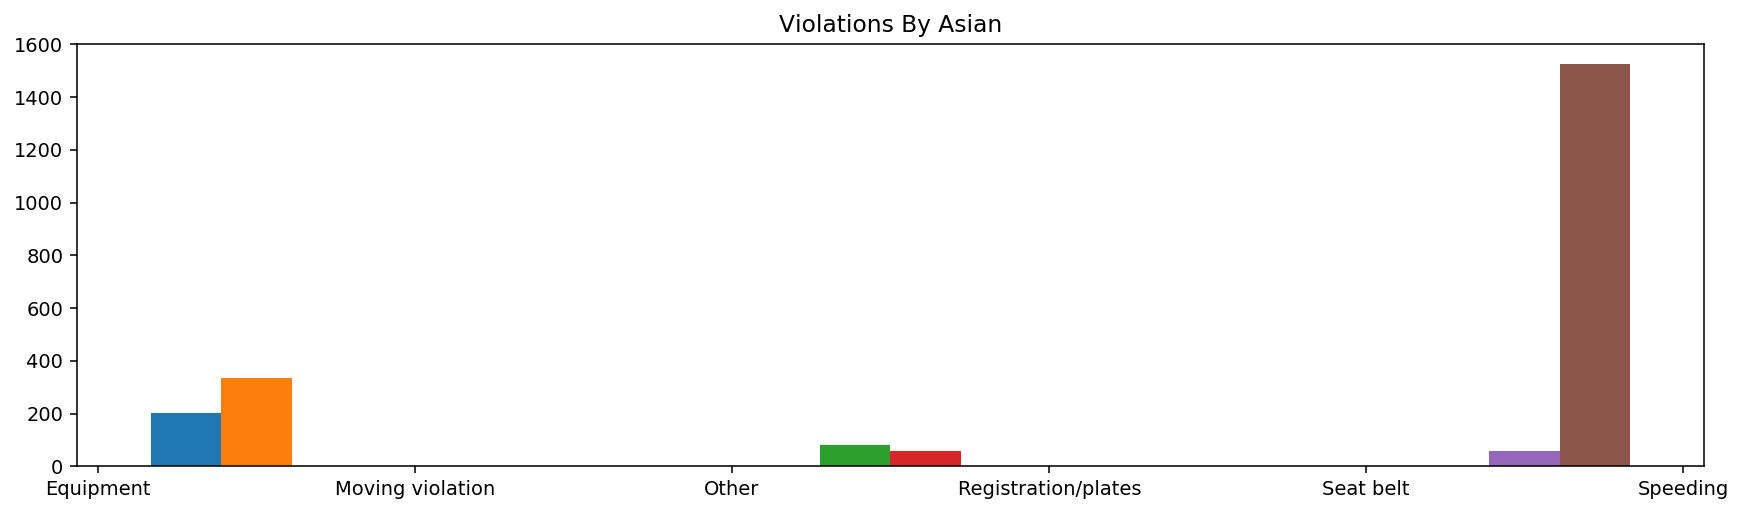

In [115]:
fig = plt.figure(dpi=140, figsize=(15, 4))
plt.hist(d['Asian'], bins=3)
plt.title('Violations By Asian')

Text(0.5, 1.0, 'Violations By Other')

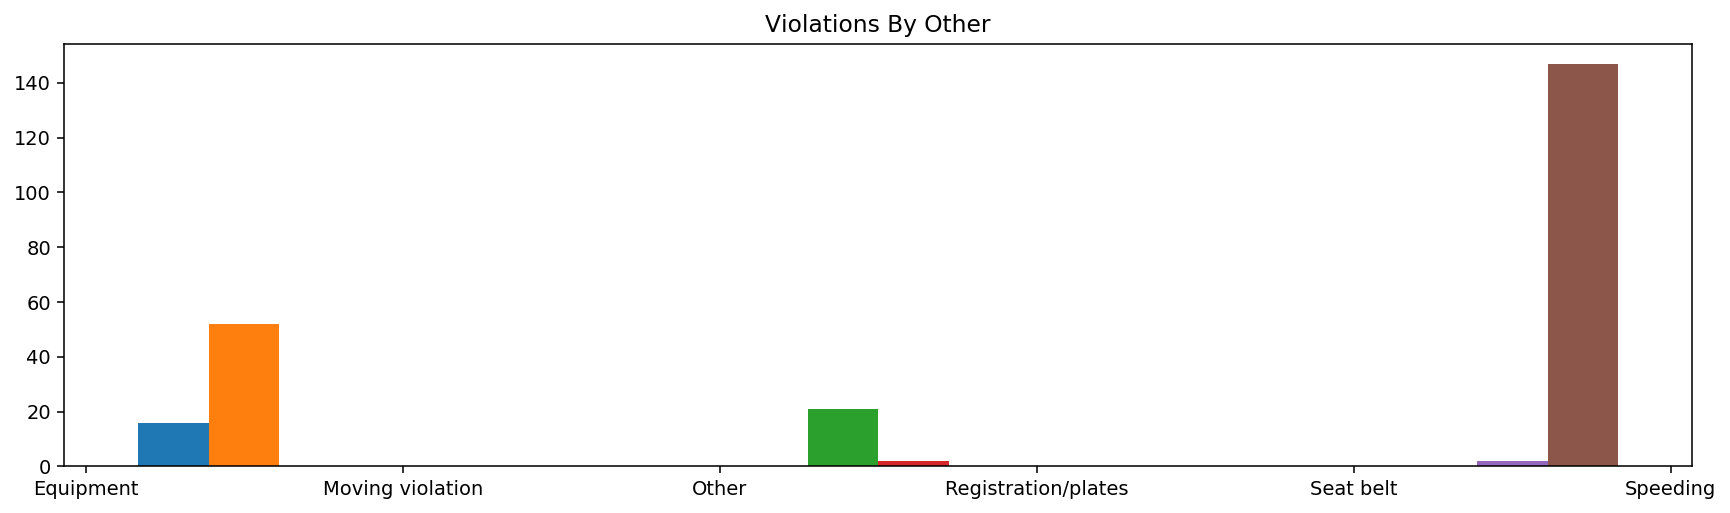

In [116]:
fig = plt.figure(dpi=140, figsize=(15, 4))
plt.hist(d['Other'], bins=3)
plt.title('Violations By Other')

In [117]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [118]:
df.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

# Violation using Date and Time

In [119]:
df['stop_date'] = pd.to_datetime(df.stop_date)

In [120]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [121]:
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [122]:
df.stop_date.isnull().sum()

0

In [123]:
df['year'] = df.stop_date.dt.year

In [124]:
df.year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: year, dtype: int64

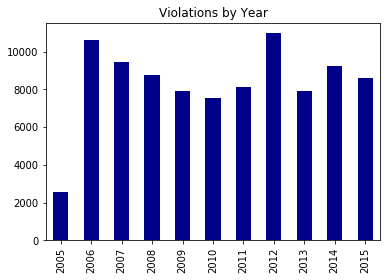

In [159]:
df.year.value_counts().sort_index().plot(kind='bar', color='darkblue', title='Violations by Year')

In [160]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


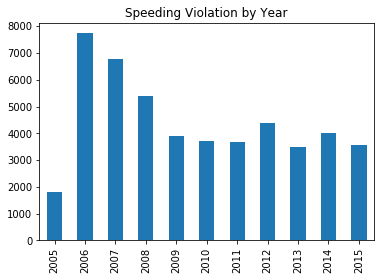

In [162]:
df.year[df['violation'] == 'Speeding'].value_counts().sort_index().plot(kind='bar', title='Speeding Violation by Year')

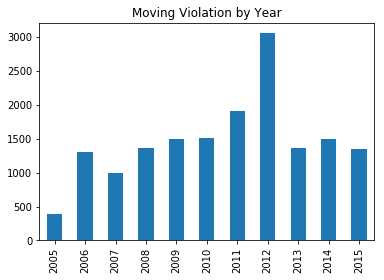

In [163]:
df.year[df['violation'] == 'Moving violation'].value_counts().sort_index().plot(kind='bar', title='Moving Violation by Year')

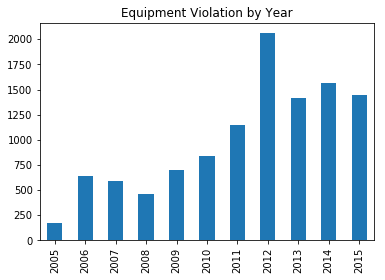

In [164]:
df.year[df['violation'] == 'Equipment'].value_counts().sort_index().plot(kind='bar', title='Equipment Violation by Year')

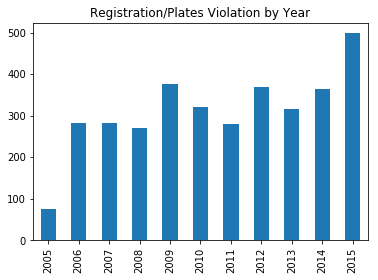

In [165]:
df.year[df['violation'] == 'Registration/plates'].value_counts().sort_index().plot(kind='bar', title='Registration/Plates Violation by Year')

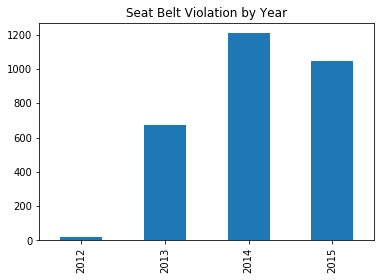

In [166]:
df.year[df['violation'] == 'Seat belt'].value_counts().sort_index().plot(kind='bar', title='Seat Belt Violation by Year')

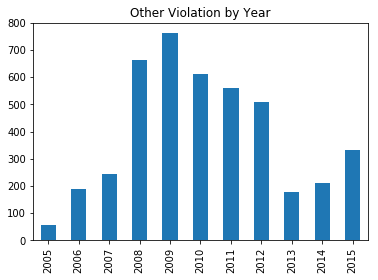

In [167]:
df.year[df['violation'] == 'Other'].value_counts().sort_index().plot(kind='bar', title='Other Violation by Year')